# Loading Statistical Files

In [8]:
from pathlib import Path
import json
import os

rootPath = str(Path().absolute().parent.parent)
transcriptsPath = "\\data\\transcripts\\gcstt\\raw\\2019-10-30\\"

jsonFilesPath = rootPath + transcriptsPath

## Get 
alljsonfiles = os.listdir(jsonFilesPath)#["77001367.flac_output.txt", "121493804.flac_output.txt", "152249110.flac_output.txt"]


djsonFiles = []

for dfile in range(len(alljsonfiles)):
    try:
        with open(jsonFilesPath+alljsonfiles[dfile]) as pf:
            jsonFile = json.load(pf)
            djsonFiles.append(jsonFile)
    except Exception as e:
        print(e)



# Podcast Confidence Scores

In [18]:
jsonFileCount = len(djsonFiles)

import pandas as pd 

# I want PodcastID, the AudioFileLength, and a list of confidence scores for each podcast.

df = pd.DataFrame(columns=["PodcastID", "AudioLength","ConfidenceScores","OverallConfidence"])

for i in range(jsonFileCount):

    jsf = djsonFiles[i]
    jsf_ts = jsf['Transcripts']
    confCount = len(jsf_ts)
    confList = []
    
    for confN in range(confCount):
        confList.append(jsf_ts[confN][0])
    
    overallConfMean = 0
    overallConfAdded = 0
    for n in confList:
        overallConfAdded += n
    
    overallConfMean = overallConfAdded / confCount
    
    df.loc[i] = [jsf['Stats']['PodcastID'].split('.')[0]] + [jsf['Stats']['AudioLength']] + [confList] + [overallConfMean] 

print(df.head(15))


     PodcastID   AudioLength  \
0   1012570406   3608.607347   
1   1028908750   2665.776750   
2   1042368254   2792.620256   
3   1043699613   7423.346938   
4   1044196249   2458.774500   
5   1047335260   3731.488531   
6   1057255460    756.985313   
7   1068563276   3297.671567   
8   1070322219  10961.552000   
9   1074507850   1447.105256   
10  1089022756   6520.932000   
11  1089216339   1683.226122   
12  1091709555   1898.470688   
13  1098413063   3183.601256   
14  1112190608   1753.458938   

                                     ConfidenceScores  OverallConfidence  
0   [0.7470839619636536, 0.9002377986907959, 0.927...           0.945600  
1   [0.966590940952301, 0.9653183221817017, 0.8806...           0.946047  
2   [0.9597625732421875, 0.9519091248512268, 0.969...           0.947966  
3   [0.9666865468025208, 0.9736114740371704, 0.920...           0.947712  
4   [0.9021533727645874, 0.9155664443969727, 0.928...           0.877605  
5   [0.902579128742218, 0.97266781330

# T2.1 Basic Stats

In [21]:
import seaborn as sns

print("Number of Samples: " + str(jsonFileCount))

audioLengthDf = df['AudioLength']
# Mean Audio Length
audioLengthAvgSeconds = audioLengthDf.mean()

# Variance of Audio Length, seconds
audioLengthVar = audioLengthDf.var()

# Std dev
audioLengthStd = audioLengthDf.std()


print("Mean Audio Length(s): " + str(audioLengthAvgSeconds))
print("Variance of Audio Length(s): " + str(audioLengthVar))
print("Std Dev of AudioLength(s): " + str(audioLengthStd))






Number of Samples: 133
Mean Audio Length(s): 2757.257756977444
Variance of Audio Length(s): 4895670.355663463
Std Dev of AudioLength(s): 2212.616179020542


In [23]:
ovConfScoreDf = df['OverallConfidence']

# Mean of Mean Confidence Scores
ovConfScoreMean = ovConfScoreDf.mean()


# Variance of Audio Length, seconds
ovConfScoreVar = ovConfScoreDf.var()

# Std dev
ovConfScoreStd = ovConfScoreDf.std()

print("Mean of Overall Confidence: " + str(ovConfScoreMean))
print("Variance of Overall Confidence: " + str(ovConfScoreVar))
print("Std dev of Overall Confidence: " + str(ovConfScoreStd))




Mean of Overall Confidence: 0.9412462754000652
Variance of Overall Confidence: 0.000390219099046108
Std dev of Overall Confidence: 0.019753964134980807


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000022DF6629788>,
      dtype=object)

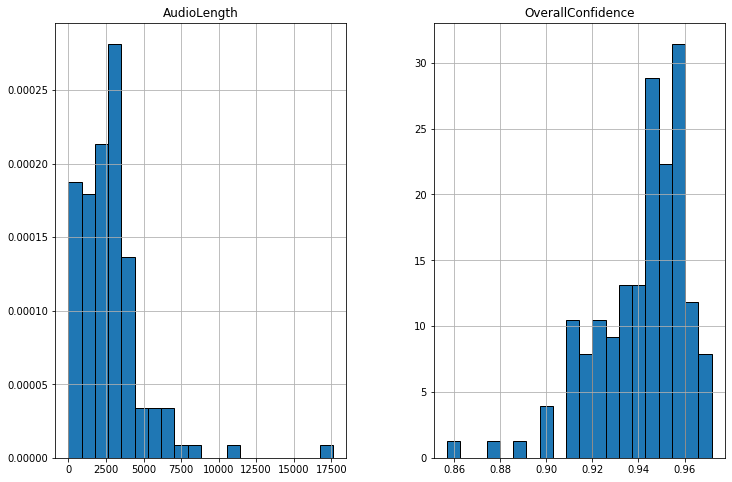

In [22]:
# Distribution of conf scores, audio length as histogram
df.hist(bins=20,density=True,ec='black', figsize=(12,8))

# Many 'Overall confidence scores' are remarkably high, from 0.94 to 0.96
# Few podcasts are more than an hour long, even fewer that are longer than that. 

# T2.2 Distribution of Average Confidence Scores
Using Maximum Likelihood Estimation

In [12]:
import scipy.stats as stats
import matplotlib.pyplot as plt
import numpy as np





array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000022DF5BA7EC8>,
      dtype=object)

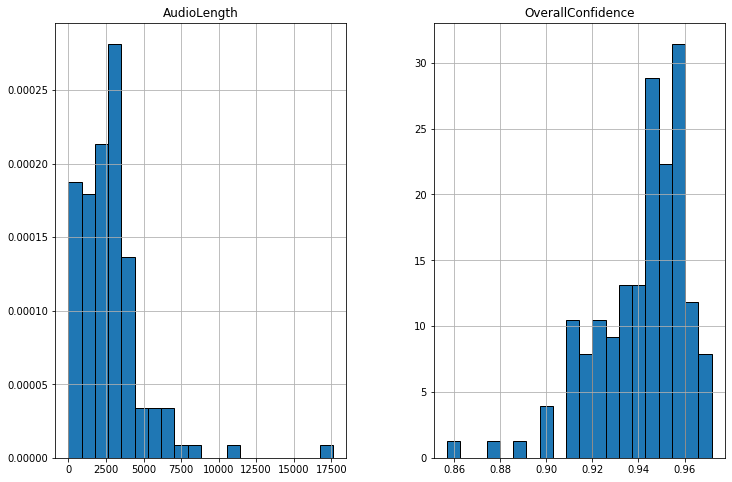

In [16]:
# Lets fit our data into the KDE Estimator


df.hist(bins=20,density=True,ec='black', figsize=(12,8))



# T2.4 Is there a relationship between the two?

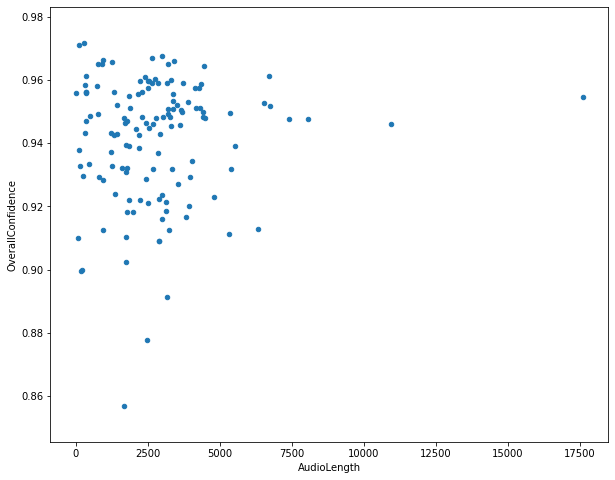

In [27]:
df.plot(kind="scatter", x="AudioLength", y="OverallConfidence", figsize=(10,8))

# No, doesn't appear to have a relation.
# Lets try individual podcasts.
# The longer the sentence (word count) the lower/higher the confidence score?

   ConfScore  WordCount
n   0.974886      214.0
e   0.876633       23.0
s   0.956187      122.0
d   0.950286      138.0
t   0.942851       91.0
r   0.974908      165.0
o   0.971565      201.0
l   0.974829      192.0
w   0.975406      197.0
y   0.973173      220.0


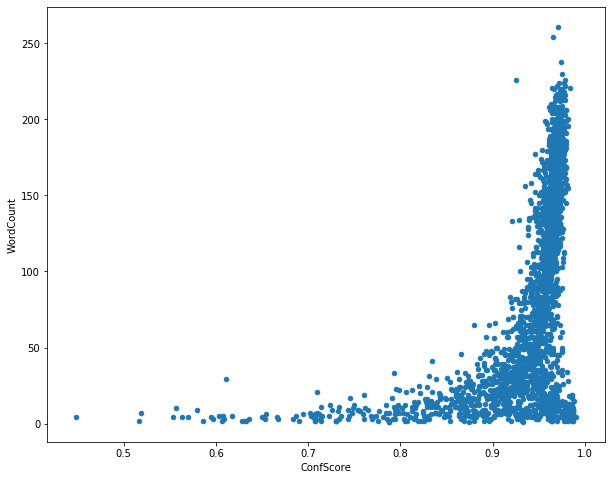

In [60]:
# Select 
jsonFileCount = len(djsonFiles)

pdf_conf = pd.DataFrame(columns=["ConfScore", "WordCount"])

for jsfEntry in djsonFiles:
    
    pdf_temp = pd.DataFrame(columns=["ConfScore","WordCount"])
    
    for n in range(len(jsfEntry['Transcripts'])):
        wordCount = 1
        for i in str(jsfEntry['Transcripts'][n][1]):
            if (i==' '):
                wordCount = wordCount + 1
        pdf_temp.loc[i] = [jsfEntry['Transcripts'][n][0]] + [ wordCount ]
    
    pdf_conf = pdf_conf.append(pdf_temp)

pdf_conf.reset_index()
print(pdf_conf.head(10))
pdf_conf.plot(kind="scatter", x="ConfScore", y="WordCount", figsize=(10,8))